## Importing relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

## Loading the dataset

In [2]:
iris = datasets.load_iris()


## Getting features

In [3]:
features= pd.DataFrame(iris.data, columns = iris.feature_names)
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Getting targets

In [4]:
target=iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Creating a dataframe for iris dataset features and targets

In [5]:
iris_data=features.copy()
iris_data['species']=target
iris_data['species']=iris_data['species'].map({0:'setosa',1:'versicolor',2:'virginica'})
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Describing the data

In [6]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizing co relation between features

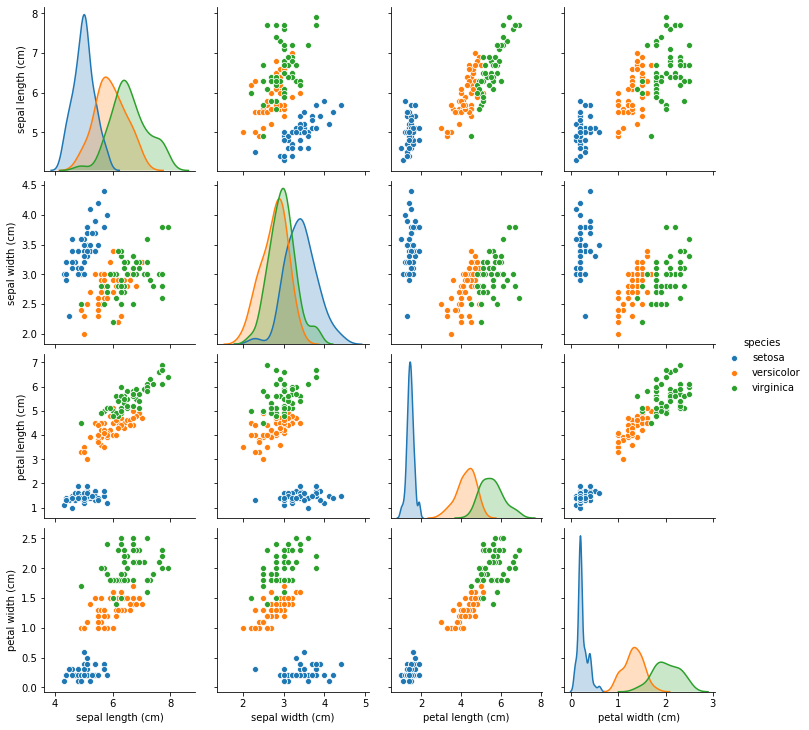

In [7]:
sns.pairplot(iris_data,hue='species')

## Performing Train-Test Split

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size = 0.3,random_state=1)

## Using Decision Tree  to train the model

In [9]:
mod_dt = tree.DecisionTreeClassifier(max_depth = 2, random_state = 1)
mod_dt.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=2, random_state=1)

## Predicting the values and calculating accuracy score

In [10]:
predicted=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(predicted,Y_test)))

The accuracy of the Decision Tree is 0.956


## Plotting the Decision Tree 

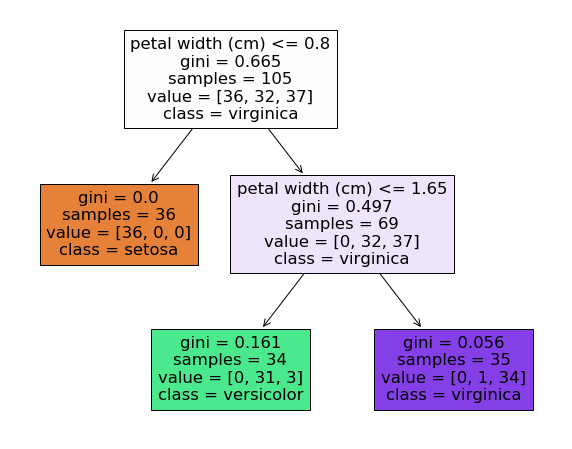

In [11]:
plt.figure(figsize = (10,8))
tree.plot_tree(mod_dt, feature_names = iris.feature_names, class_names = iris.target_names, filled = True);

## Creating confusion matrix

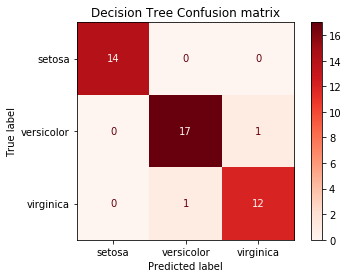

In [12]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, Y_test,
                                 display_labels=iris.target_names,
                                 cmap=plt.cm.Reds,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix');